In [1]:
import numpy as np
import pandas as pd

logp_       = np.arange(0,6)
plogstep    = 10**(0.2)
p_          = 360* plogstep**(logp_)
p_          = p_.astype(int)
MSE         = np.zeros(len(p_))
MSE_SE      = np.zeros(len(p_))
bias        = np.zeros(len(p_))
var         = np.zeros(len(p_))

C:\Users\arnab\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\arnab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\arnab\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# results for LASSO negative #

pstr    = '1_5'
typestr = 'lin'

loaded_results = pd.read_csv(typestr + '_del' + pstr + '/lasso_non.csv')
MSE = loaded_results['msevec']
MSE_SE = loaded_results['mse_se']
p_ = loaded_results['p_']

# results for LASSO positive #

loaded_results = pd.read_csv(typestr + '_del' + pstr + '/lasso_pos.csv')
MSE2 = loaded_results['msevec']
MSE_SE2 = loaded_results['mse_se']

# results for ELNET negative #

loaded_results = pd.read_csv(typestr + '_del' + pstr + '/elnet_non.csv')
MSE3 = loaded_results['msevec']
MSE_SE3 = loaded_results['mse_se']

# results for ELNET positive #

loaded_results = pd.read_csv(typestr + '_del' + pstr + '/elnet_pos.csv')
MSE4 = loaded_results['msevec']
MSE_SE4 = loaded_results['mse_se']

In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

ls_mse_fit = sm.OLS(np.log(MSE), sm.add_constant(np.log(p_))).fit()
a_mse = ls_mse_fit.params[1]
R2_mse = ls_mse_fit.rsquared

print(f" MSE: scaling = {a_mse:.2f} | R2 = {R2_mse:.2f}")

# Calculate MSE standard error
#MSE_SE = np.std((lo - outErr) ** 2, axis=0) / np.sqrt(MCMCsamples)
#print("Mean squared errors:", np.mean((lo - outErr) ** 2, axis=0))
print("MSE standard errors:", MSE_SE)

# Calculate logarithms
log_MSE = np.log(MSE)
log_p_ = np.log(p_)

 MSE: scaling = -0.85 | R2 = 0.99
MSE standard errors: 0    0.007209
1    0.003353
2    0.002562
3    0.001528
4    0.001214
5    0.000720
Name: mse_se, dtype: float64


In [4]:
if(pstr == '1_5'):
    pstr1 = '1.5'
if(pstr == '1_0'):
    pstr1 = '1.0'
if(pstr == '0_5'):
    pstr1 = '0.5'

# Fit models to log-transformed data and get confidence intervals
ls_mse_fit = sm.OLS(np.log(MSE), sm.add_constant(np.log(p_))).fit()
a_mse = ls_mse_fit.params[1]
R2_mse = ls_mse_fit.rsquared

ls_mse_fit2 = sm.OLS(np.log(MSE2), sm.add_constant(np.log(p_))).fit()
a_mse2 = ls_mse_fit2.params[1]
R2_mse2 = ls_mse_fit2.rsquared

ls_mse_fit3 = sm.OLS(np.log(MSE3), sm.add_constant(np.log(p_))).fit()
a_mse3 = ls_mse_fit3.params[1]
R2_mse3 = ls_mse_fit3.rsquared

ls_mse_fit4 = sm.OLS(np.log(MSE4), sm.add_constant(np.log(p_))).fit()
a_mse4 = ls_mse_fit4.params[1]
R2_mse4 = ls_mse_fit4.rsquared


# Calculate confidence intervals for the slopes
conf_int_mse = ls_mse_fit.conf_int().iloc[1,:]
conf_int_mse2 = ls_mse_fit2.conf_int().iloc[1,:]
conf_int_mse3 = ls_mse_fit3.conf_int().iloc[1,:]
conf_int_mse4 = ls_mse_fit4.conf_int().iloc[1,:]

# Calculate confidence intervals for the slopes
conf_int_inter_mse = ls_mse_fit.conf_int().iloc[0,:]
conf_int_inter_mse2 = ls_mse_fit2.conf_int().iloc[0,:]
conf_int_inter_mse3 = ls_mse_fit3.conf_int().iloc[0,:]
conf_int_inter_mse4 = ls_mse_fit4.conf_int().iloc[0,:]

print(f"MSE (LASSO-non): scaling = {a_mse:.2f} | R2 = {R2_mse:.2f} | CI = [{conf_int_mse[0]:.2f}, {conf_int_mse[1]:.2f}]")
print(f"MSE (LASSO-pos): scaling = {a_mse2:.2f} | R2 = {R2_mse2:.2f} | CI = [{conf_int_mse2[0]:.2f}, {conf_int_mse2[1]:.2f}]")
print(f"MSE (ElNet-non): scaling = {a_mse3:.2f} | R2 = {R2_mse3:.2f} | CI = [{conf_int_mse3[0]:.2f}, {conf_int_mse3[1]:.2f}]")
print(f"MSE (ElNet-pos): scaling = {a_mse4:.2f} | R2 = {R2_mse4:.2f} | CI = [{conf_int_mse4[0]:.2f}, {conf_int_mse4[1]:.2f}]")

MSE (LASSO-non): scaling = -0.85 | R2 = 0.99 | CI = [-0.98, -0.72]
MSE (LASSO-pos): scaling = -0.94 | R2 = 0.99 | CI = [-1.08, -0.79]
MSE (ElNet-non): scaling = -0.86 | R2 = 0.99 | CI = [-0.99, -0.73]
MSE (ElNet-pos): scaling = -0.94 | R2 = 1.00 | CI = [-1.00, -0.88]


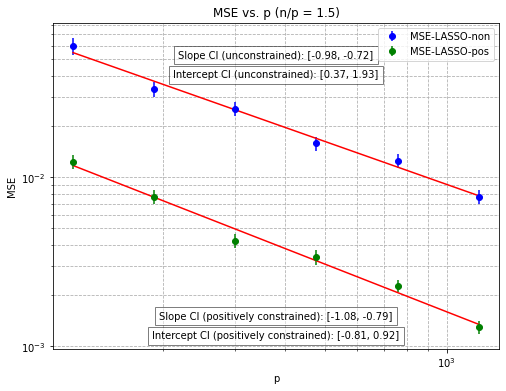

In [5]:

import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

# Plot MSE vs. p with regression line and error bars
axs.errorbar(p_, MSE, yerr=MSE_SE, fmt='o', color='blue', label='MSE-LASSO-non')
axs.plot(p_, np.exp(ls_mse_fit.predict(sm.add_constant(np.log(p_)))), color='red')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('p')
axs.set_ylabel('MSE')
axs.set_title('MSE vs. p'+' (n/p = '+pstr1+')')
axs.grid(True, which="both", ls="--")
axs.legend()
axs.text(0.5, 0.9, f'Slope CI (unconstrained): [{conf_int_mse[0]:.2f}, {conf_int_mse[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs.text(0.5, 0.84, f'Intercept CI (unconstrained): [{conf_int_inter_mse[0]:.2f}, {conf_int_inter_mse[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

axs.errorbar(p_, MSE2, yerr=MSE_SE2, fmt='o', color='green', label='MSE-LASSO-pos')
axs.plot(p_, np.exp(ls_mse_fit2.predict(sm.add_constant(np.log(p_)))), color='red')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('p')
axs.set_ylabel('MSE')
axs.set_title('MSE vs. p'+' (n/p = '+pstr1+')')
axs.grid(True, which="both", ls="--")
axs.legend()
axs.text(0.5, 0.1, f'Slope CI (positively constrained): [{conf_int_mse2[0]:.2f}, {conf_int_mse2[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs.text(0.5, 0.04, f'Intercept CI (positively constrained): [{conf_int_inter_mse2[0]:.2f}, {conf_int_inter_mse2[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
fig.savefig(typestr+pstr+'-lasso.pdf')

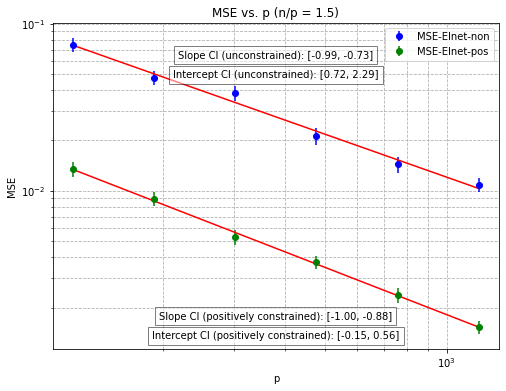

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))

axs.errorbar(p_, MSE3, yerr=MSE_SE3, fmt='o', color='blue', label='MSE-Elnet-non')
axs.plot(p_, np.exp(ls_mse_fit3.predict(sm.add_constant(np.log(p_)))), color='red')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('p')
axs.set_ylabel('MSE')
axs.set_title('MSE vs. p'+' (n/p = '+pstr1+')')
axs.grid(True, which="both", ls="--")
axs.legend()
axs.text(0.5, 0.9, f'Slope CI (unconstrained): [{conf_int_mse3[0]:.2f}, {conf_int_mse3[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs.text(0.5, 0.84, f'Intercept CI (unconstrained): [{conf_int_inter_mse3[0]:.2f}, {conf_int_inter_mse3[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

axs.errorbar(p_, MSE4, yerr=MSE_SE4, fmt='o', color='green', label='MSE-Elnet-pos')
axs.plot(p_, np.exp(ls_mse_fit4.predict(sm.add_constant(np.log(p_)))), color='red')
axs.set_xscale('log')
axs.set_yscale('log')
axs.set_xlabel('p')
axs.set_ylabel('MSE')
axs.set_title('MSE vs. p'+' (n/p = '+pstr1+')')
axs.grid(True, which="both", ls="--")
axs.legend()
axs.text(0.5, 0.1, f'Slope CI (positively constrained): [{conf_int_mse4[0]:.2f}, {conf_int_mse4[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
axs.text(0.5, 0.04, f'Intercept CI (positively constrained): [{conf_int_inter_mse4[0]:.2f}, {conf_int_inter_mse4[1]:.2f}]',
            transform=axs.transAxes, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
fig.savefig(typestr+pstr+'-elnet.pdf')